In [29]:
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.linear_model import LinearRegression, PoissonRegressor
from sklearn.model_selection import cross_val_predict as cvp
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.metrics import r2_score

In [30]:
pd.set_option('display.max_columns', None)

In [31]:
training_data = pd.read_csv("TrainingData/pre_processed.csv")

In [32]:
def plot_predicted_and_target(target_data, predicted_data, title): 
    plt.figure(figsize=(20,10))
    font = {'size'   : 20}
    plt.rc('font', **font)
    
    plt.plot(range(1, len(predicted_data) + 1), predicted_data, label = "predicted")
    plt.plot(range(1, len(target_data) + 1), target_data, label = "target")
    
    plt.xlabel('scenario')
    plt.ylabel('response time')
    plt.title(title)
    plt.legend()
    plt.show()

In [33]:
def plot_mse(raw_mse, title): 
    plt.figure(figsize=(20,10))
    plt.plot(range(1, len(raw_mse) + 1), raw_mse, label = "MSE")
    plt.xlabel('scenario')
    plt.ylabel('error')
    plt.title(title)
    plt.legend()
    plt.show()

In [34]:
def get_MSE(target_data, predicted_data):
    uniform_average = mean_squared_error(target_data, predicted_data, multioutput='uniform_average')
    raw_values = mean_squared_error(target_data, predicted_data, multioutput='raw_values')
    return uniform_average, raw_values

In [35]:
target = training_data['avg_response_time']
train = training_data.drop(['avg_response_time'], axis=1)

In [36]:
pca = PCA(n_components=6)
pca_train = pca.fit_transform(train)

# XGBoost

In [37]:
xgb_model = xgb.XGBRegressor()
xgb_y_pred = cvp(xgb_model, train, target, cv = 5, n_jobs = 1)
xgb_y_pred

array([1.2848253 , 0.6593998 , 0.66241986, 1.2798884 , 3.766056  ,
       1.278427  , 1.2725897 , 0.6672257 , 1.2888066 , 0.498271  ,
       1.966946  , 0.66082466, 2.001902  , 0.6416797 , 1.0034031 ,
       0.64764696, 0.41167113, 3.4639733 , 1.2875353 , 0.5017826 ,
       1.2775104 , 3.7724998 , 0.29733294, 1.8906329 , 1.2854357 ,
       1.9773315 , 0.6503484 , 1.27945   , 0.9912301 , 0.6595086 ,
       0.16670933, 0.665718  , 0.6639964 , 0.14655411, 2.5569613 ,
       0.67259824, 0.6466689 , 0.6465819 , 1.9826113 , 1.8953732 ,
       0.14957918, 1.2831649 , 1.2847049 , 0.1632108 , 3.6206124 ,
       0.14952667, 0.64052606, 0.6724962 , 1.268262  , 1.015674  ,
       1.2884562 , 1.2801939 , 1.9861792 , 2.213949  , 0.41205364,
       0.6570279 , 2.020996  , 1.270979  , 1.7504163 , 1.2839209 ,
       2.2337801 , 1.2873191 , 0.6690244 , 0.30632883, 1.2968678 ,
       2.0265715 , 0.6515955 , 0.67412865, 2.1445868 , 0.3986621 ,
       1.2716913 , 1.2677256 , 0.14811024, 0.66366106, 0.66055

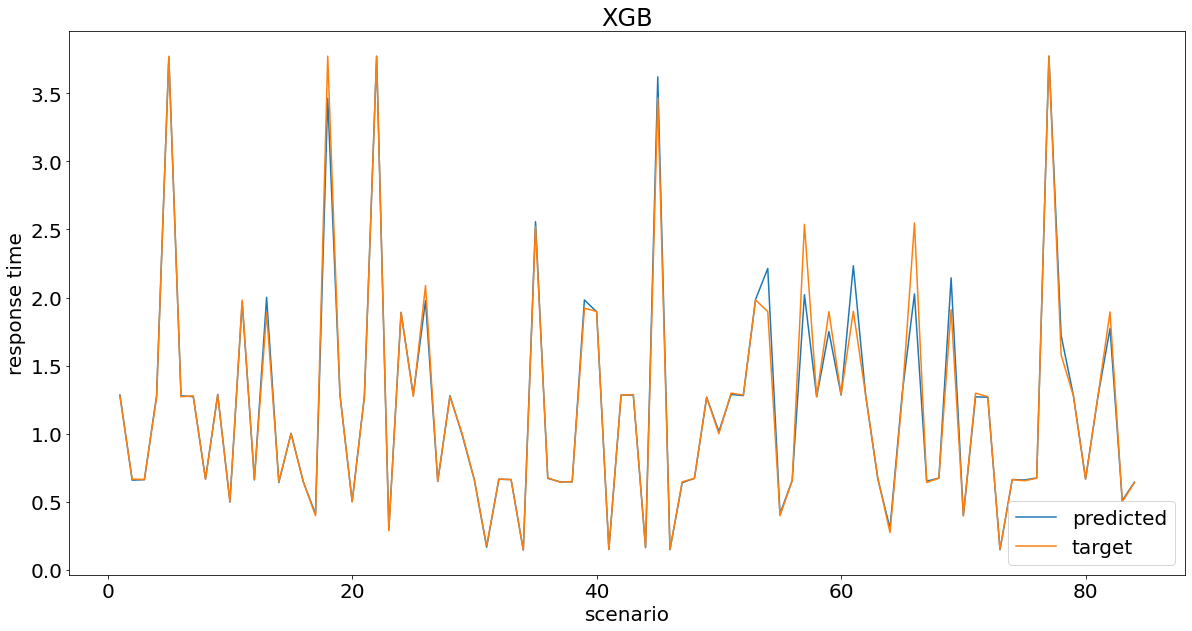

In [38]:
plot_predicted_and_target(target, xgb_y_pred, 'XGB')

In [39]:
xgb_mse, xgb_mse_raw = get_MSE(target, xgb_y_pred)
print("XGB MSE: {}".format(xgb_mse))

XGB MSE: 0.01209731957272633


In [40]:
r2_xgb = r2_score(target, xgb_y_pred)
print("XGB R2 score:", r2_xgb)

XGB R2 score: 0.983716626189028


# XGBoost with PCA

In [41]:
xgb_pca_y_pred = cvp(xgb_model, pca_train, target, cv = 5, n_jobs = 1)
xgb_pca_y_pred

array([1.2729937 , 0.6691227 , 0.6937764 , 0.86103225, 3.7176547 ,
       1.3588394 , 0.90001214, 0.667528  , 1.282468  , 0.8621693 ,
       2.012607  , 0.6593542 , 3.4646182 , 0.6759773 , 1.3803648 ,
       0.64639765, 0.41075805, 2.0011122 , 1.2854528 , 0.53802687,
       1.2470441 , 3.7723851 , 0.3895178 , 1.8736429 , 1.2565826 ,
       1.9810905 , 0.6498308 , 1.2607998 , 0.6749749 , 0.6626366 ,
       0.1821555 , 0.6664888 , 1.2100167 , 0.15235634, 1.3115381 ,
       0.9559148 , 0.7735627 , 0.63588357, 0.8059288 , 1.897532  ,
       0.2388076 , 1.2978935 , 1.4473951 , 0.17142317, 2.0925918 ,
       0.23628119, 0.7681748 , 0.6670089 , 1.3045636 , 1.1957203 ,
       1.415166  , 1.2829716 , 1.9813836 , 2.9871442 , 0.6550606 ,
       0.65543956, 1.368242  , 2.0301178 , 3.0452094 , 1.2848824 ,
       1.3341501 , 1.2992312 , 1.2353005 , 0.29115862, 2.0276494 ,
       1.3486996 , 0.64940834, 0.6507337 , 1.943199  , 0.40122837,
       0.70030785, 1.2657745 , 0.14815253, 0.7464213 , 0.65958

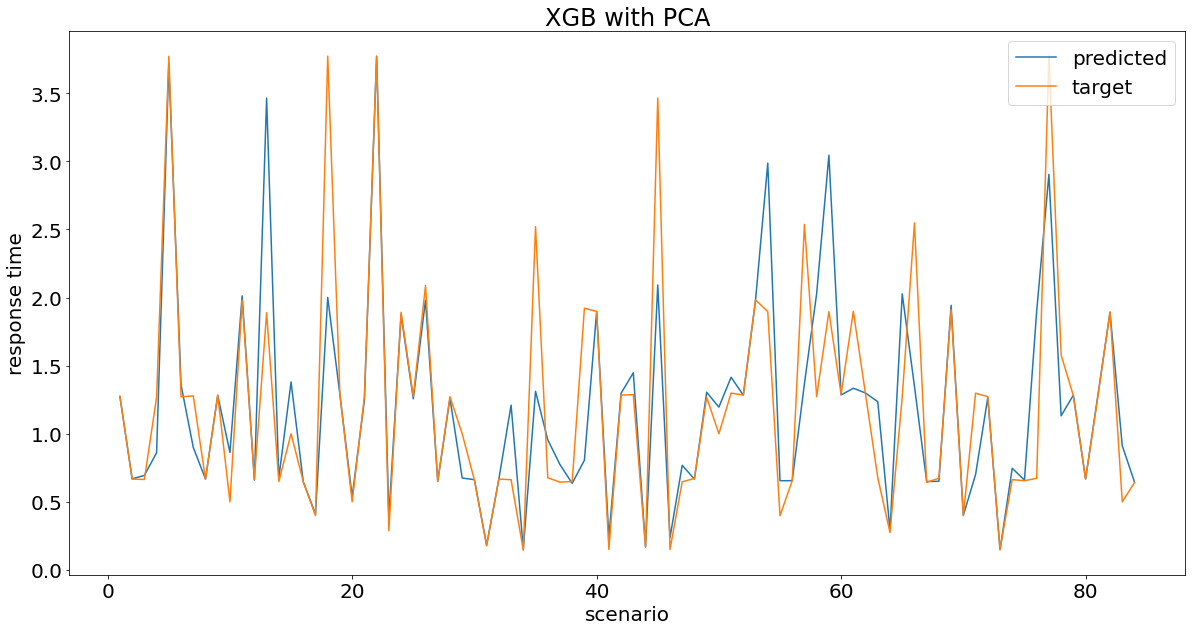

In [42]:
plot_predicted_and_target(target, xgb_pca_y_pred, 'XGB with PCA')

In [43]:
xgb_pca_mse, xgb_pca_mse_raw = get_MSE(target, xgb_pca_y_pred)
print("XGB with PCA MSE:{}".format(xgb_pca_mse))

XGB with PCA MSE:0.25717128372083203


In [44]:
r2_pca_xgb = r2_score(target, xgb_pca_y_pred)
print("XGB with PCA R2 score:", r2_pca_xgb)

XGB with PCA R2 score: 0.6538393384502376


# Linear Regression

In [45]:
reg_model = LinearRegression(positive=True, fit_intercept=False)
reg_y_pred = cvp(reg_model, train, target, cv = 5, n_jobs = 1)
reg_y_pred

array([1.4991958 , 0.95995683, 0.95995683, 1.38067468, 2.3406315 ,
       1.38067468, 1.38067468, 0.95995683, 1.38067468, 0.95995683,
       1.80139253, 0.95995683, 1.80139253, 0.95995683, 1.38067468,
       0.95995683, 1.37000135, 2.86219445, 1.34158237, 0.96142935,
       1.34158237, 2.30301171, 0.87656131, 1.72173539, 1.34158237,
       1.72173539, 0.96142935, 1.54270567, 1.34158237, 0.96142935,
       0.49640829, 0.96142935, 0.96142935, 0.49640829, 1.95194896,
       0.97597448, 0.97597448, 0.97597448, 1.76814191, 1.76814191,
       0.51206187, 1.37205819, 1.37205819, 0.51206187, 2.95639305,
       0.51206187, 0.97597448, 0.97597448, 1.37205819, 1.37205819,
       1.55586524, 1.38020505, 1.815245  , 1.815245  , 1.40714488,
       0.9451651 , 1.89033019, 1.45529024, 1.815245  , 1.45529024,
       1.815245  , 1.38020505, 0.9451651 , 0.97210493, 1.45529024,
       1.89033019, 0.9451651 , 0.9451651 , 1.80635117, 1.39157853,
       1.37705604, 1.37705604, 0.53298828, 0.94776092, 0.94776

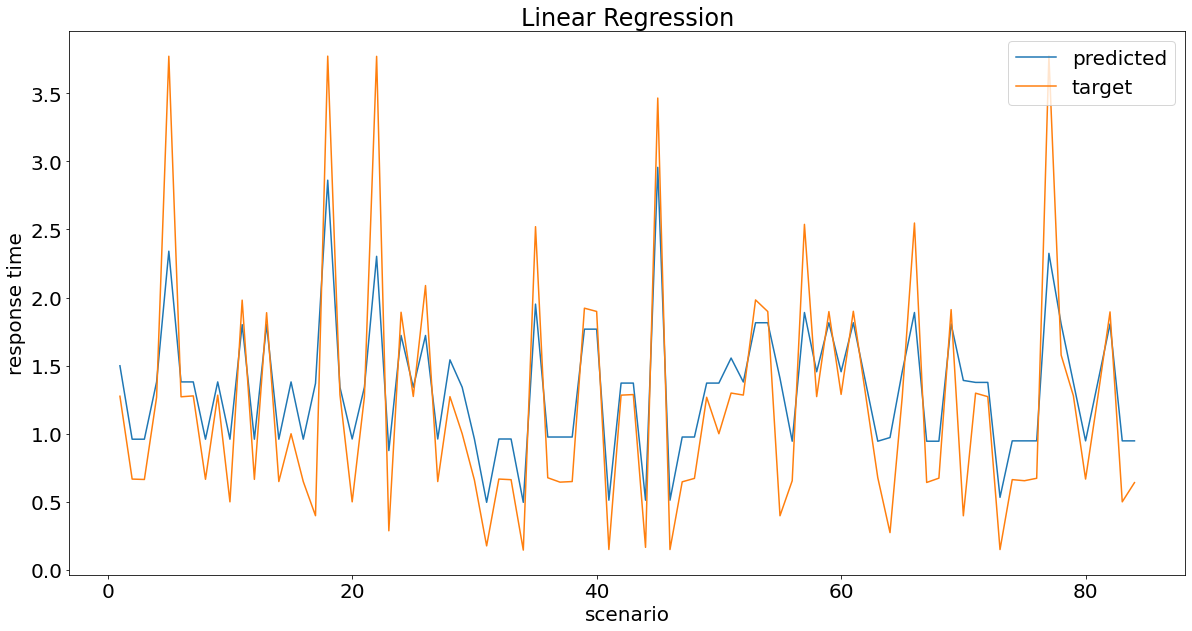

In [46]:
plot_predicted_and_target(target, reg_y_pred, 'Linear Regression')

In [47]:
reg_mse, reg_mse_raw = get_MSE(target, reg_y_pred)
print("Linear Regression MSE:{}".format(reg_mse))

Linear Regression MSE:0.20325524242555681


In [48]:
r2_reg = r2_score(target, reg_y_pred)
print("Linear Regression R2 Score:", r2_reg)

Linear Regression R2 Score: 0.7264120310653926


# Linear Regression with PCA

In [49]:
reg_model_pca = LinearRegression()
reg_pca_y_pred = cvp(reg_model_pca, pca_train, target, cv = 5, n_jobs = 1)
reg_pca_y_pred

array([ 1.69888301,  0.73096491,  0.7230906 ,  1.28779507,  2.91621458,
        1.27946382,  1.23181474,  0.69353939,  1.35871074,  0.37159831,
        1.9952283 ,  0.72219317,  1.93326455,  0.62282809,  1.0887803 ,
        0.60930594,  1.07618952,  3.73734312,  1.31403579,  0.48109739,
        1.22187237,  2.9206229 ,  0.42474219,  1.90622029,  1.22688493,
        1.96956069,  0.65886237,  1.7424783 ,  1.02743543,  0.71286908,
       -0.27081496,  0.64565774,  0.65687841, -0.31449966,  2.33430659,
        0.71332756,  0.53348514,  0.54689135,  1.91086833,  1.87618247,
       -0.37009308,  1.31186662,  1.35174828, -0.27437271,  3.67856005,
       -0.38898703,  0.55372527,  0.65167905,  1.24862306,  1.1143249 ,
        1.83085804,  1.38598973,  1.98667183,  1.90167427,  1.00362343,
        0.78530763,  2.49757154,  1.85109091,  1.87114669,  1.88331271,
        1.94087329,  1.36314168,  0.57617925,  0.39380602,  1.78563024,
        2.38576914,  0.65133639,  0.59940922,  1.9565049 ,  1.07

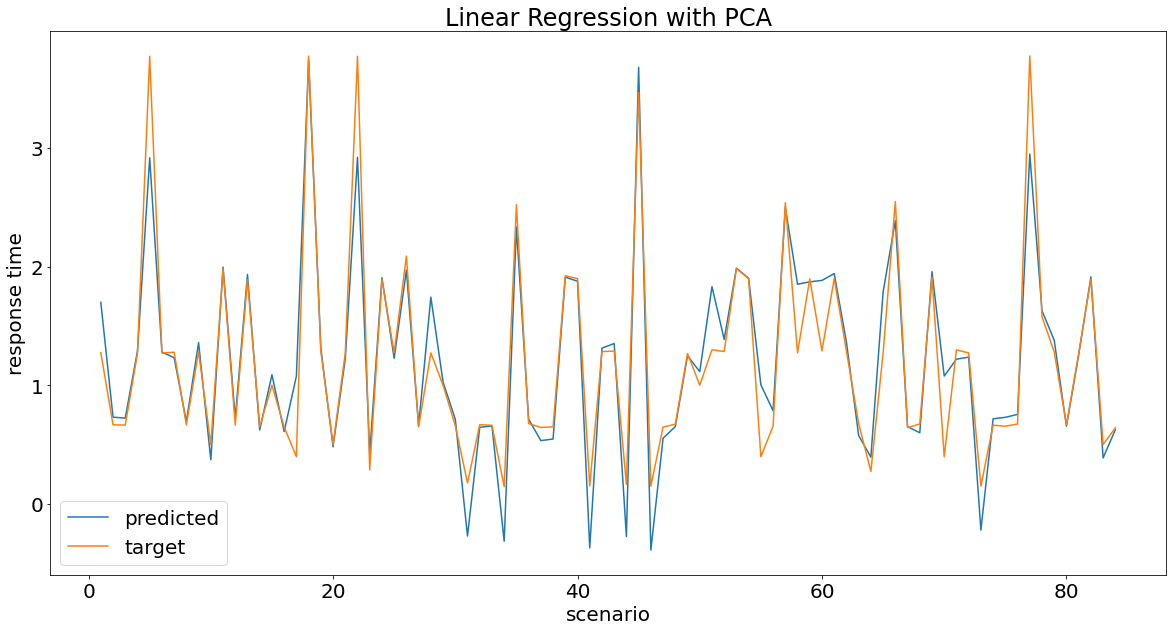

In [50]:
plot_predicted_and_target(target, reg_pca_y_pred, 'Linear Regression with PCA')

In [51]:
reg_pca_mse, reg_pca_mse_raw = get_MSE(target, reg_pca_y_pred)
print("Linear Regression with PCA MSE:{}".format(reg_pca_mse))

Linear Regression with PCA MSE:0.08022868048006113


In [52]:
r2_reg_pca = r2_score(target, reg_pca_y_pred)
print("Linear Regression with PCA R2 Score:", r2_reg_pca)

Linear Regression with PCA R2 Score: 0.8920096648878189
